<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential

169001437/169001437 [==============================] - 11s 0us/step


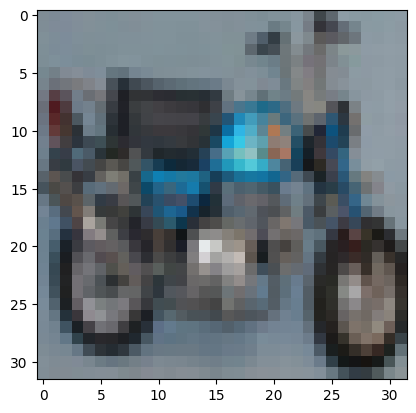

Number: [48]


In [ ]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
hinh = train_images[10000]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print('Number:',train_labels[10000])

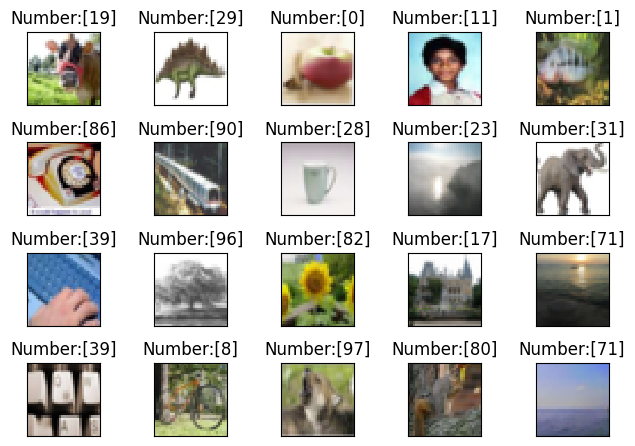

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('Number:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
model = Sequential() #Just like ANN
model.add(Dense(512, activation = 'relu',input_shape = (32*32*3,))) 
model.add(Dense(100,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((50000, 32*32*3)) #reshape 60000 images shaped 28x28 pixel
train_images = train_images.astype('float32')/255 #Convert it into 0-1

In [ ]:
test_images = test_images.reshape((10000,32*32*3))
test_image = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical #one hot encoding
train_labels = to_categorical(train_labels, 100) #Converts a class vector (integers) to binary class matrix
test_labels = to_categorical(test_labels, 100) #Converts a class vector (integers) to binary class matrix

In [ ]:
#Compile model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Fit model
model.fit(train_images, train_labels, epochs = 10, batch_size = 784)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy followed by the test folder:', test_acc*100)
print('Loss function', test_loss)

Epoch 1/10
64/64 [==============================] - 10s 144ms/step - loss: 4.2478 - accuracy: 0.0641
Epoch 2/10
64/64 [==============================] - 7s 117ms/step - loss: 4.0146 - accuracy: 0.0904
Epoch 3/10
64/64 [==============================] - 8s 129ms/step - loss: 3.8875 - accuracy: 0.1129
Epoch 4/10
64/64 [==============================] - 9s 134ms/step - loss: 3.7959 - accuracy: 0.1276
Epoch 5/10
64/64 [==============================] - 7s 113ms/step - loss: 3.7284 - accuracy: 0.1429
Epoch 6/10
64/64 [==============================] - 9s 134ms/step - loss: 3.6679 - accuracy: 0.1514
Epoch 7/10
64/64 [==============================] - 9s 140ms/step - loss: 3.6155 - accuracy: 0.1583
Epoch 8/10
64/64 [==============================] - 8s 121ms/step - loss: 3.5763 - accuracy: 0.1651
Epoch 9/10
64/64 [==============================] - 9s 136ms/step - loss: 3.5338 - accuracy: 0.1759
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 398.2311 - accuracy: 0.1

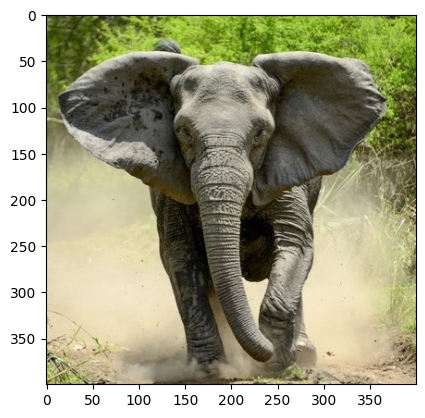

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
url = 'Elephant.jpg'
img = load_img(url)
imshow(img)

In [ ]:
img = load_img(url, target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 31ms/step


array([65])